# Lab 1
`By Yurii Voievidka`

## Task 1

In [1]:
import pandas as pd

In [2]:
train_raw = pd.read_csv('hourly_wages_data.csv')
X = train_raw.drop(columns=['wage_per_hour'])
y = train_raw['wage_per_hour']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=1) ## 0.33 * 0.3 = 0.1 for test


In [4]:
## Scaling and Normalization
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X_train.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
106,1,14,21,41,0,1,0,0,0
189,0,18,14,38,1,1,0,0,0
504,0,17,10,33,1,0,0,0,0
477,0,18,27,51,0,1,0,0,0
350,0,2,16,24,0,0,0,0,0


In [6]:
## Scaling

# scaled_X = minmax_scaling(y_train, columns=['wage_per_hour'])
# ax = sns.histplot(scaled_X, kde=True)
# ax.set_title('Scaled wages')
# ax.show()


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)

n_cols = X_train.shape[1]

model = Sequential([
    Dense(200, activation='relu', input_shape=(n_cols, )),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),
    Dense(1)
])

2022-10-20 13:06:02.032493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
history = model.fit(X_train, 
          y_train, 
          validation_split=0.0, 
          validation_data=(X_val, y_val),
          epochs=30, 
          callbacks=[early_stopping_monitor])

Epoch 1/30
12/12 [==============================] - 0s 10ms/step - loss: 49.8509 - val_loss: 28.3068
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 26.6679 - val_loss: 29.5990
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 24.4375 - val_loss: 27.1673
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 24.1735 - val_loss: 25.7230
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 23.7176 - val_loss: 25.2984
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 24.2055 - val_loss: 24.6180
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 24.2912 - val_loss: 24.3560
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 25.2078 - val_loss: 26.9597
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 24.5889 - val_loss: 26.7796
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 24.3689 - val_loss: 24.492

In [10]:
model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


array([[ 8.838239 ],
       [12.383261 ],
       [11.187466 ],
       [ 6.5674553],
       [ 7.379874 ],
       [10.121279 ],
       [ 5.7359924],
       [10.722162 ],
       [11.432495 ],
       [ 8.561602 ],
       [10.944492 ],
       [12.6062155],
       [ 8.707092 ],
       [ 8.79829  ],
       [ 6.931494 ],
       [ 7.9875402],
       [ 6.9640684],
       [ 9.762164 ],
       [ 7.455203 ],
       [11.808729 ],
       [ 9.562335 ],
       [10.888786 ],
       [ 8.092546 ],
       [11.866339 ],
       [ 8.33149  ],
       [ 7.0288067],
       [ 8.013874 ],
       [ 9.99709  ],
       [10.812759 ],
       [ 9.200587 ],
       [ 9.615652 ],
       [10.8864765],
       [ 8.289356 ],
       [ 8.833775 ],
       [10.226558 ],
       [13.07739  ],
       [10.944601 ],
       [ 8.305561 ],
       [ 7.053316 ],
       [ 9.009874 ],
       [ 9.363468 ],
       [ 8.426254 ],
       [ 6.5217314],
       [ 8.37051  ],
       [10.255308 ],
       [ 8.857332 ],
       [ 7.7422657],
       [ 5.92

<AxesSubplot:title={'center':'loss plot'}>

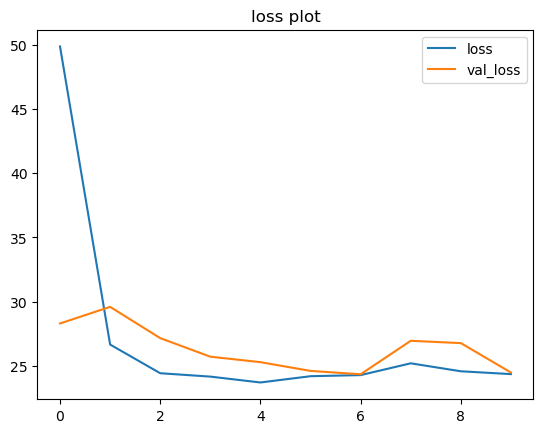

In [11]:
model_dataframe = pd.DataFrame(history.history)
model_dataframe.loc[:, ['loss', 'val_loss']].plot(title='loss plot')


In [12]:
model.compile(optimizer='sgd', loss='mae')

In [13]:
history = model.fit(X_train, 
          y_train, 
          validation_split=0.0, 
          validation_data=(X_val, y_val),
          epochs=30, 
          callbacks=[early_stopping_monitor])

Epoch 1/30
12/12 [==============================] - 0s 8ms/step - loss: 4.4086 - val_loss: 3.9306
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 4.2217 - val_loss: 6.0480
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 4.1126 - val_loss: 3.8226
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 3.5278 - val_loss: 3.5655
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 3.8294 - val_loss: 4.2037
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 3.8728 - val_loss: 3.5051
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 3.9027 - val_loss: 3.9008
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 3.7374 - val_loss: 3.3664
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 3.6198 - val_loss: 3.4880
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 3.6239 - val_loss: 3.3716
Epoch 11/30
12/12 [

In [14]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


<AxesSubplot:title={'center':'loss plot'}>

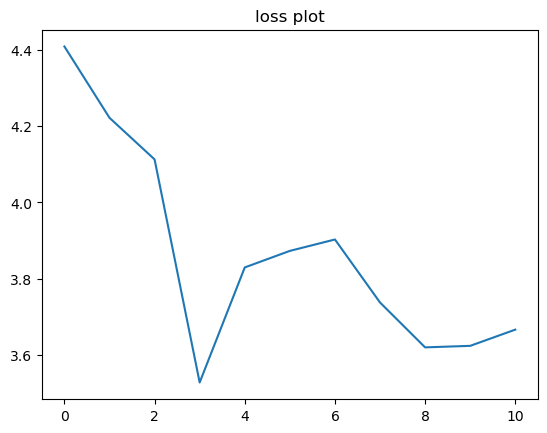

In [15]:
model_dataframe = pd.DataFrame(history.history)
model_dataframe['loss'].plot(title='loss plot')


## Task 2

In [16]:
from keras.utils import to_categorical

In [17]:
train_raw = pd.read_csv('./hourly_wages_data.csv')
X = train_raw.drop(columns=['manufacturing'])
y = train_raw['manufacturing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=1) ## 0.33 * 0.3 = 0.1 for test

print(y_train[:5])

106    0
189    0
504    0
477    0
350    0
Name: manufacturing, dtype: int64


In [18]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)
y_test_categorical = to_categorical(y_test)


In [19]:
model_2 = Sequential()

In [20]:
n_cols_2 = X_train.shape[1]

In [21]:
model_2.add(Dense(200, activation='relu', input_shape=(n_cols_2,)))
model_2.add(Dense(200, activation='relu'))
model_2.add(Dense(200, activation='relu'))
model_2.add(Dense(2, activation='softmax'))


In [22]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model_2.fit(X_train, y_train_categorical, epochs=30, validation_split=0.0, validation_data=(X_val, y_val_categorical), callbacks=[early_stopping_monitor])

Epoch 1/30
12/12 [==============================] - 0s 11ms/step - loss: 0.9312 - accuracy: 0.7292 - val_loss: 0.5977 - val_accuracy: 0.7407
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7775 - val_loss: 0.4908 - val_accuracy: 0.8333
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.7989 - val_loss: 0.4790 - val_accuracy: 0.8333
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7962 - val_loss: 0.4640 - val_accuracy: 0.8148
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7694 - val_loss: 0.4847 - val_accuracy: 0.8333
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.5145 - accuracy: 0.7962 - val_loss: 0.4743 - val_accuracy: 0.8333
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 0.4870 - accuracy: 0.7989 - val_loss: 0.4728 - val_accuracy: 0.8333


In [24]:
predictions = model_2.predict(X_test)
print(predictions[:5])

4/4 [==============================] - 0s 1ms/step
[[0.938518   0.06148205]
 [0.8993662  0.10063383]
 [0.8234548  0.17654519]
 [0.9232503  0.07674974]
 [0.804888   0.195112  ]]


<AxesSubplot:title={'center':'loss plot with adam'}>

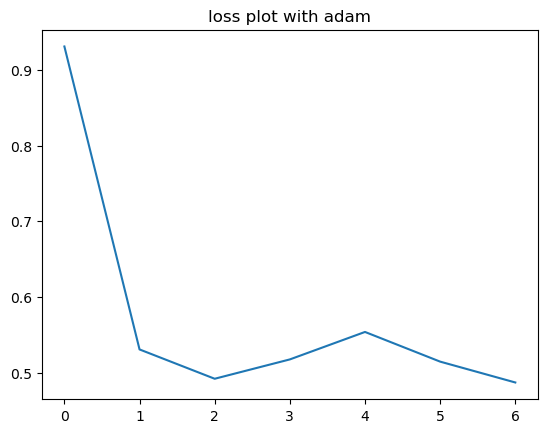

In [25]:
model_dataframe = pd.DataFrame(history.history)
model_dataframe['loss'].plot(title='loss plot with adam')


In [26]:
model_2.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model_2.fit(X_train, y_train_categorical, epochs=30,batch_size=256, validation_split=0.0, validation_data=(X_val, y_val_categorical))

Epoch 1/30
2/2 [==============================] - 0s 114ms/step - loss: 0.4729 - accuracy: 0.8043 - val_loss: 0.4729 - val_accuracy: 0.8333
Epoch 2/30
2/2 [==============================] - 0s 20ms/step - loss: 0.4728 - accuracy: 0.8043 - val_loss: 0.4729 - val_accuracy: 0.8333
Epoch 3/30
2/2 [==============================] - 0s 19ms/step - loss: 0.4726 - accuracy: 0.8043 - val_loss: 0.4729 - val_accuracy: 0.8333
Epoch 4/30
2/2 [==============================] - 0s 19ms/step - loss: 0.4725 - accuracy: 0.8043 - val_loss: 0.4729 - val_accuracy: 0.8333
Epoch 5/30
2/2 [==============================] - 0s 20ms/step - loss: 0.4723 - accuracy: 0.8043 - val_loss: 0.4730 - val_accuracy: 0.8333
Epoch 6/30
2/2 [==============================] - 0s 20ms/step - loss: 0.4722 - accuracy: 0.8043 - val_loss: 0.4730 - val_accuracy: 0.8333
Epoch 7/30
2/2 [==============================] - 0s 21ms/step - loss: 0.4721 - accuracy: 0.8043 - val_loss: 0.4731 - val_accuracy: 0.8333
Epoch 8/30
2/2 [==========

In [28]:
predictions = model_2.predict(X_test)
print(predictions[:5])

4/4 [==============================] - 0s 1ms/step
[[0.9333506  0.06664943]
 [0.88368183 0.11631814]
 [0.8081886  0.19181143]
 [0.9182345  0.08176547]
 [0.7840763  0.21592373]]


In [29]:
# Comparing Adam and Adadelta we see that adadelta predicts more accurate due to stepsize

<AxesSubplot:title={'center':'loss plot with adadelta'}>

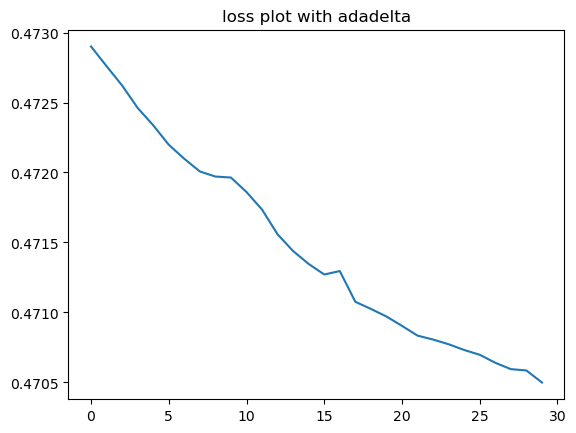

In [30]:
model_dataframe = pd.DataFrame(history.history)
model_dataframe['loss'].plot(title='loss plot with adadelta')


## Task 3
Predict ABV (alcohol by volume) of beer

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [32]:
X_raw = pd.read_csv('./beers.csv')
X_raw.head()

,Unnamed: 0,count.x,abv,ibu,id,beer,style,brewery_id,ounces,style2,count.y,brewery,city,state,label
0,1,1,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,NaN,409,10 Barrel Brewing Company,Bend,OR,Pub Beer (10 Barrel Brewing Company)
1,2,2,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,American Pale Ale (APA),178,18th Street Brewery,Gary,IN,Devil's Cup (18th Street Brewery)
2,3,3,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,American IPA,178,18th Street Brewery,Gary,IN,Rise of the Phoenix (18th Street Brewery)
3,4,4,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,American Double / Imperial IPA,178,18th Street Brewery,Gary,IN,Sinister (18th Street Brewery)
4,5,5,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,American IPA,178,18th Street Brewery,Gary,IN,Sex and Candy (18th Street Brewery)


In [33]:
X_drop_garbage = X_raw.drop(columns=[X_raw.columns[0], X_raw.columns[1]], axis=1)
X = X_drop_garbage.drop(columns=['abv','ibu','id','ounces','count.y'])
y = X_raw['abv']
X.head()

,beer,style,brewery_id,style2,brewery,city,state,label
0,Pub Beer,American Pale Lager,408,NaN,10 Barrel Brewing Company,Bend,OR,Pub Beer (10 Barrel Brewing Company)
1,Devil's Cup,American Pale Ale (APA),177,American Pale Ale (APA),18th Street Brewery,Gary,IN,Devil's Cup (18th Street Brewery)
2,Rise of the Phoenix,American IPA,177,American IPA,18th Street Brewery,Gary,IN,Rise of the Phoenix (18th Street Brewery)
3,Sinister,American Double / Imperial IPA,177,American Double / Imperial IPA,18th Street Brewery,Gary,IN,Sinister (18th Street Brewery)
4,Sex and Candy,American IPA,177,American IPA,18th Street Brewery,Gary,IN,Sex and Candy (18th Street Brewery)


In [34]:
n_cols = X.shape[1]
model_3 = Sequential([
    Dense(200, activation='relu', input_shape=(n_cols, )),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),
    Dense(1)
])

In [35]:
model_3.compile(optimizer='adam',  loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)
my_encoder = OrdinalEncoder()
my_imputer = SimpleImputer(strategy='mean')

train_X = pd.DataFrame(my_imputer.fit_transform(my_encoder.fit_transform(train_X)))
test_X = pd.DataFrame(my_imputer.fit_transform(my_encoder.fit_transform(test_X)))

history_3 = model_3.fit(train_X,
            train_y,
            validation_split=0.2,
            epochs=30, 
            callbacks=[early_stopping_monitor])

Epoch 1/30
49/49 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/30
49/49 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/30
49/49 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


In [37]:
train_X.head()

,0,1,2,3,4,5,6,7
0,1370.0,16.0,350.0,4.000000,166.0,53.0,5.0,1382.0
1,79.0,59.0,234.0,2.773196,122.0,8.0,15.0,79.0
2,312.0,37.0,238.0,2.773196,300.0,305.0,22.0,313.0
3,1332.0,20.0,262.0,2.773196,187.0,256.0,39.0,1344.0
4,586.0,13.0,101.0,3.000000,79.0,100.0,5.0,592.0


In [38]:
predictions = model_3.predict(test_X)
print(predictions[:5])

16/16 [==============================] - 0s 763us/step
[[-16.357132]
 [-32.766834]
 [-20.83664 ]
 [-60.11602 ]
 [-20.438852]]


<AxesSubplot:title={'center':'loss plot'}>

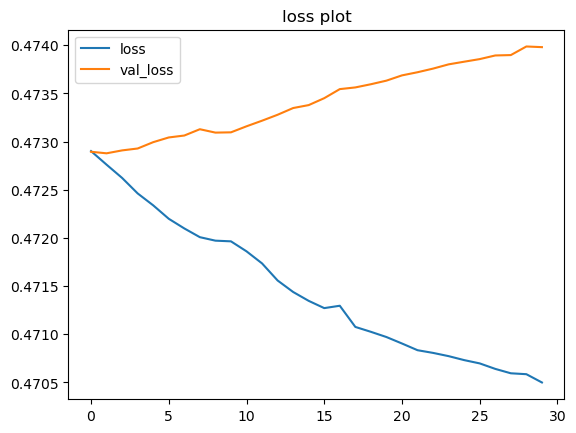

In [39]:
model_dataframe = pd.DataFrame(history.history)
model_dataframe.loc[:, ['loss', 'val_loss']].plot(title='loss plot')